<h1> Solution of QHO by solving the Schrödinger equation </h1>

The Schrödinger equation for the quantum harmonic oscillator (QHO) is given by
$$ \frac{-\hbar^2}{2m} \frac{d^2\psi(x)}{dx^2} + \frac{1}{2} m \omega^2 x^2 \psi(x) = E \psi(x) $$
where $\hbar$ is the reduced Planck constant, $m$ is the mass of the particle, $\omega$ is the angular frequency of the oscillator, $E$ is the energy of the system, and $\psi(x)$ is the wave function of the system.

In [164]:
import numpy as np
import scipy as sp
from Library_TP import *

Setting $\hbar = m = \omega = 1$, the Schrödinger equation becomes
$$ -\frac{1}{2} \frac{d^2\psi(x)}{dx^2} + \frac{1}{2} x^2 \psi(x) = E \psi(x) $$
This is a second-order ordinary differential equation (ODE) with a potential term $V(x) = \frac{1}{2} x^2$.


In [165]:
E=2.5

def dy_by_dx(varlist,x):
    return varlist[1]

def dz_by_dx(varlist,x):
    return varlist[0]*(x**2  - 2*E)


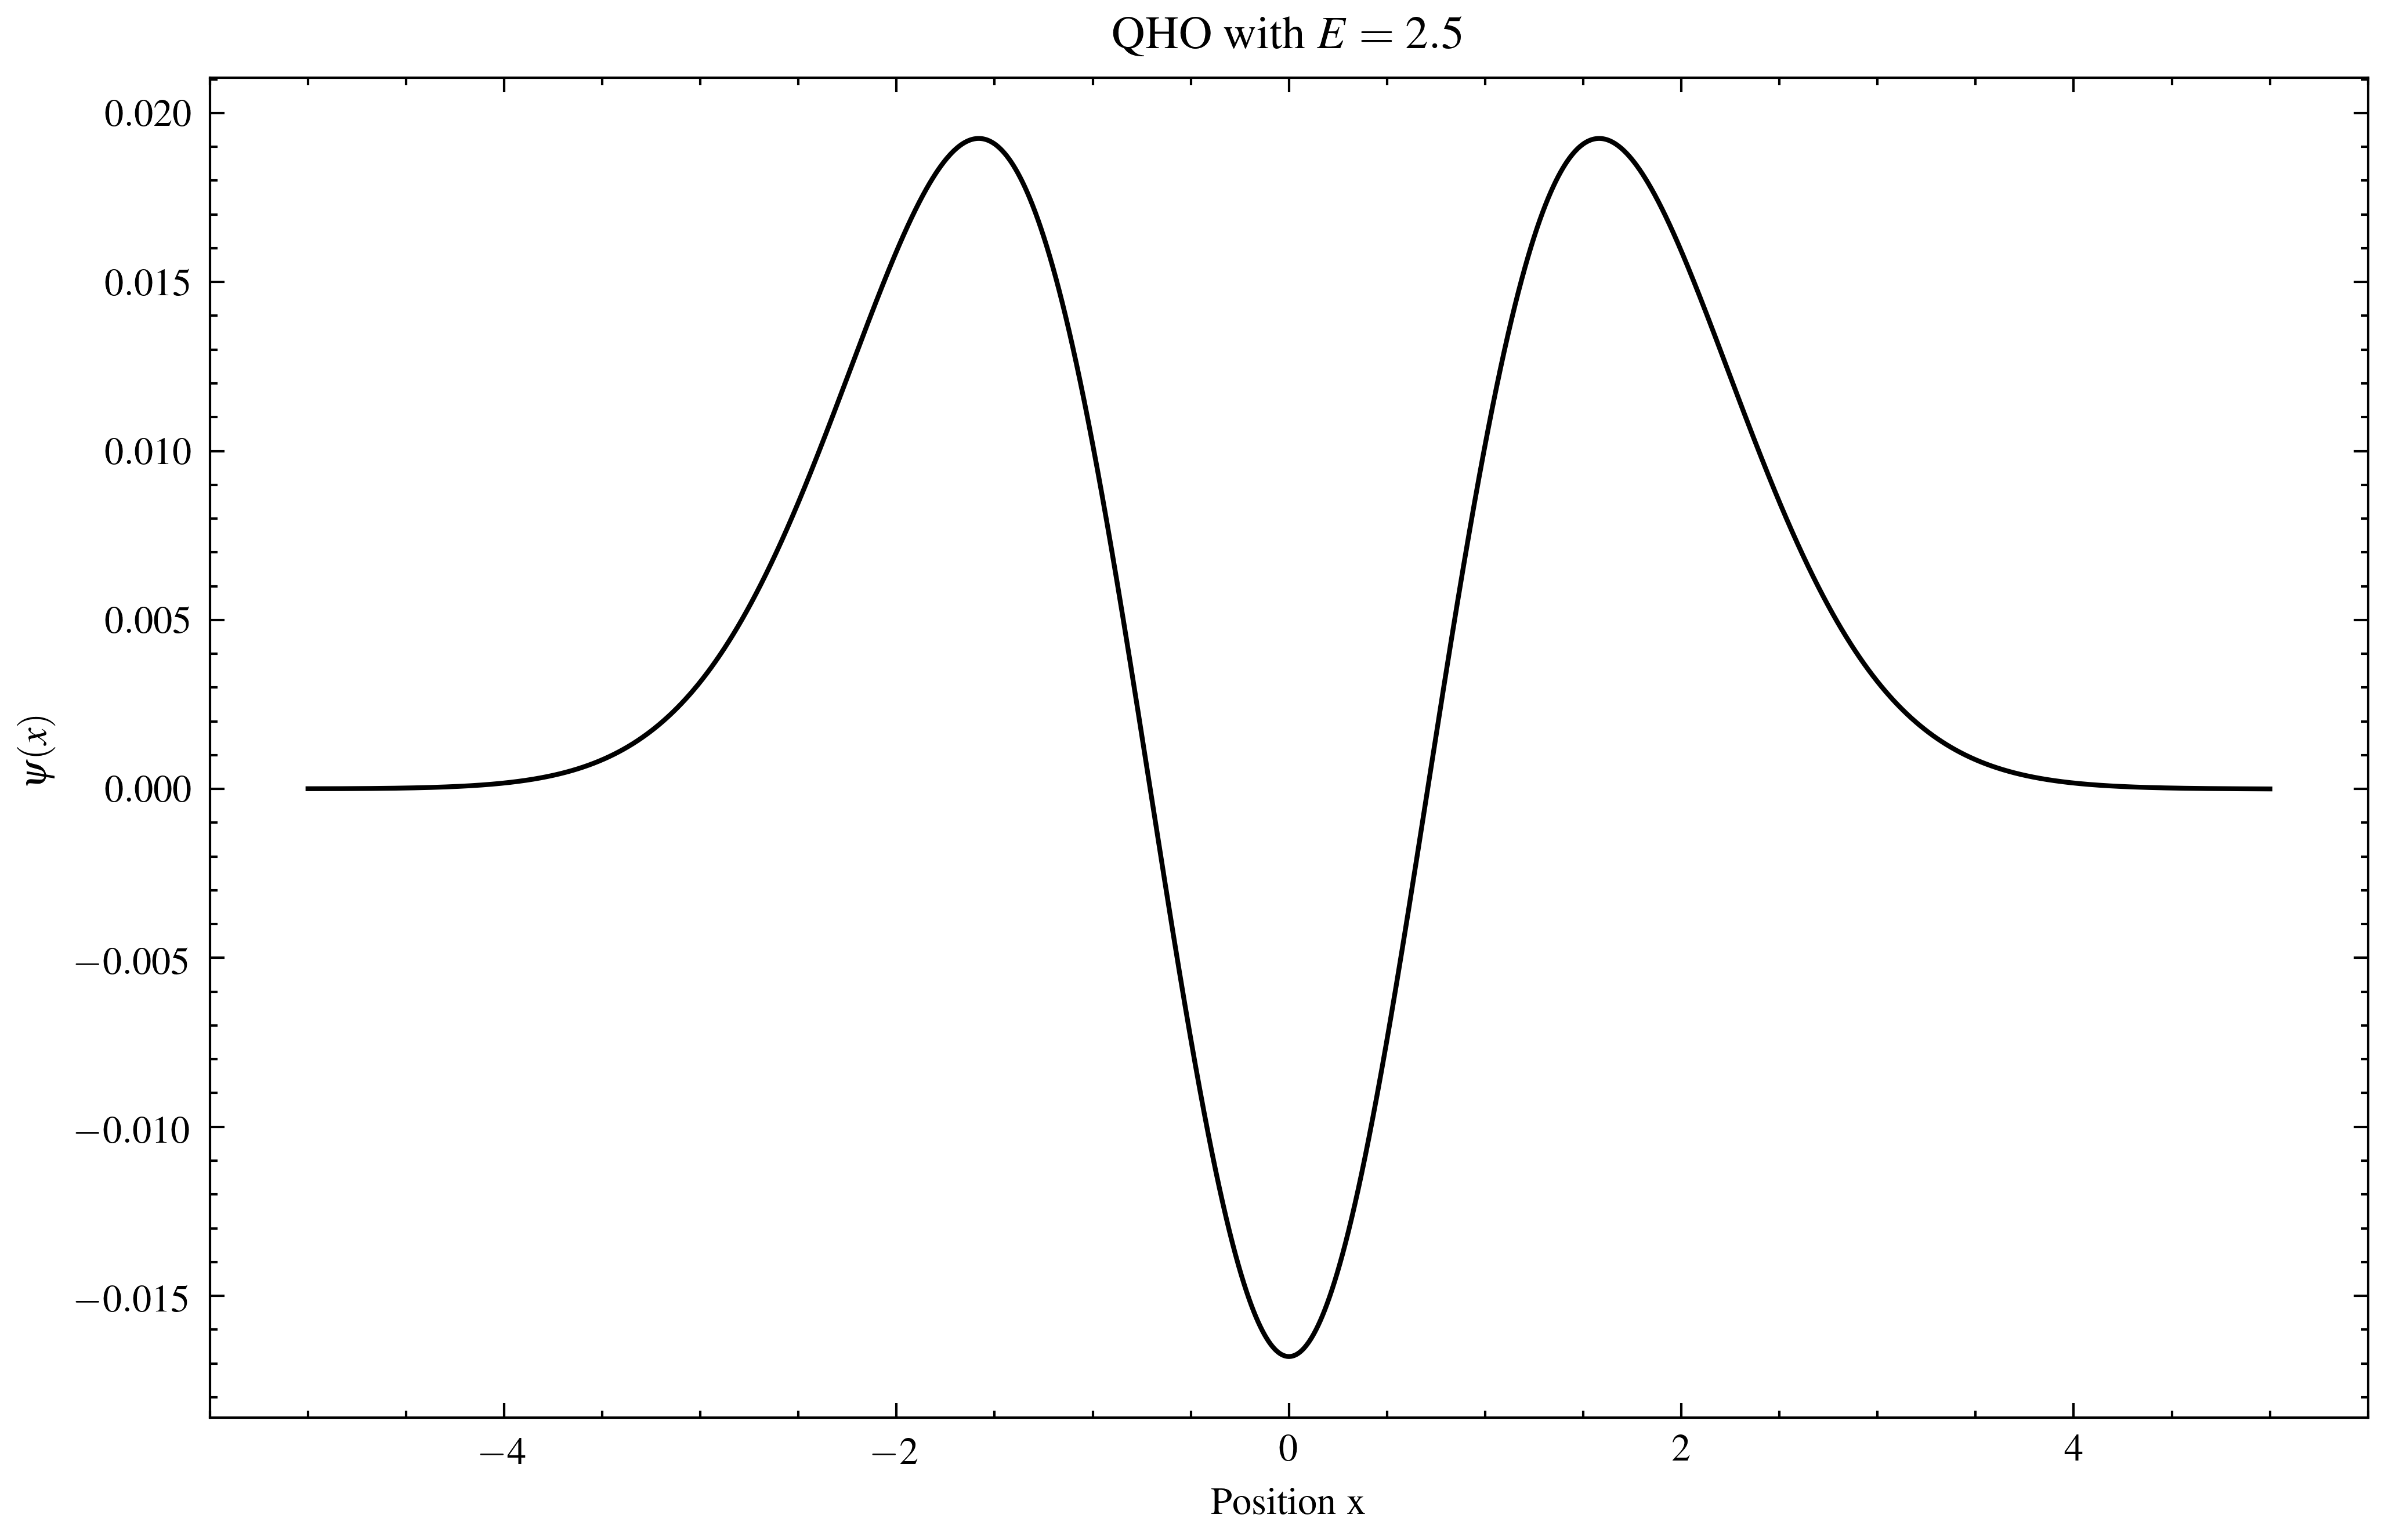

In [166]:

fnlist = [dy_by_dx,dz_by_dx]
x0 = -5
y0s = [1,0]
X,Y = RK4_solve_coupled(fnlist,x0,y0s,5,0.001)
psi = Y[0]
psi = psi/np.linalg.norm(psi)
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','ieee'])
plt.figure(figsize=(8,5))
plt.plot(X,psi)
plt.xlabel('Position x')
plt.ylabel(r'$\psi(x)$')
plt.title(rf'QHO with $E = {E}$')
plt.show()


In [167]:
del fnlist,x0,y0s,X,Y,psi,E,dy_by_dx,dz_by_dx,plt

# 2D Harmonic Oscillator


In [168]:
Ex = 5.5
Ey = 4.5
k=2
h = 0.001

## Solving the X-component of the Schrödinger equation

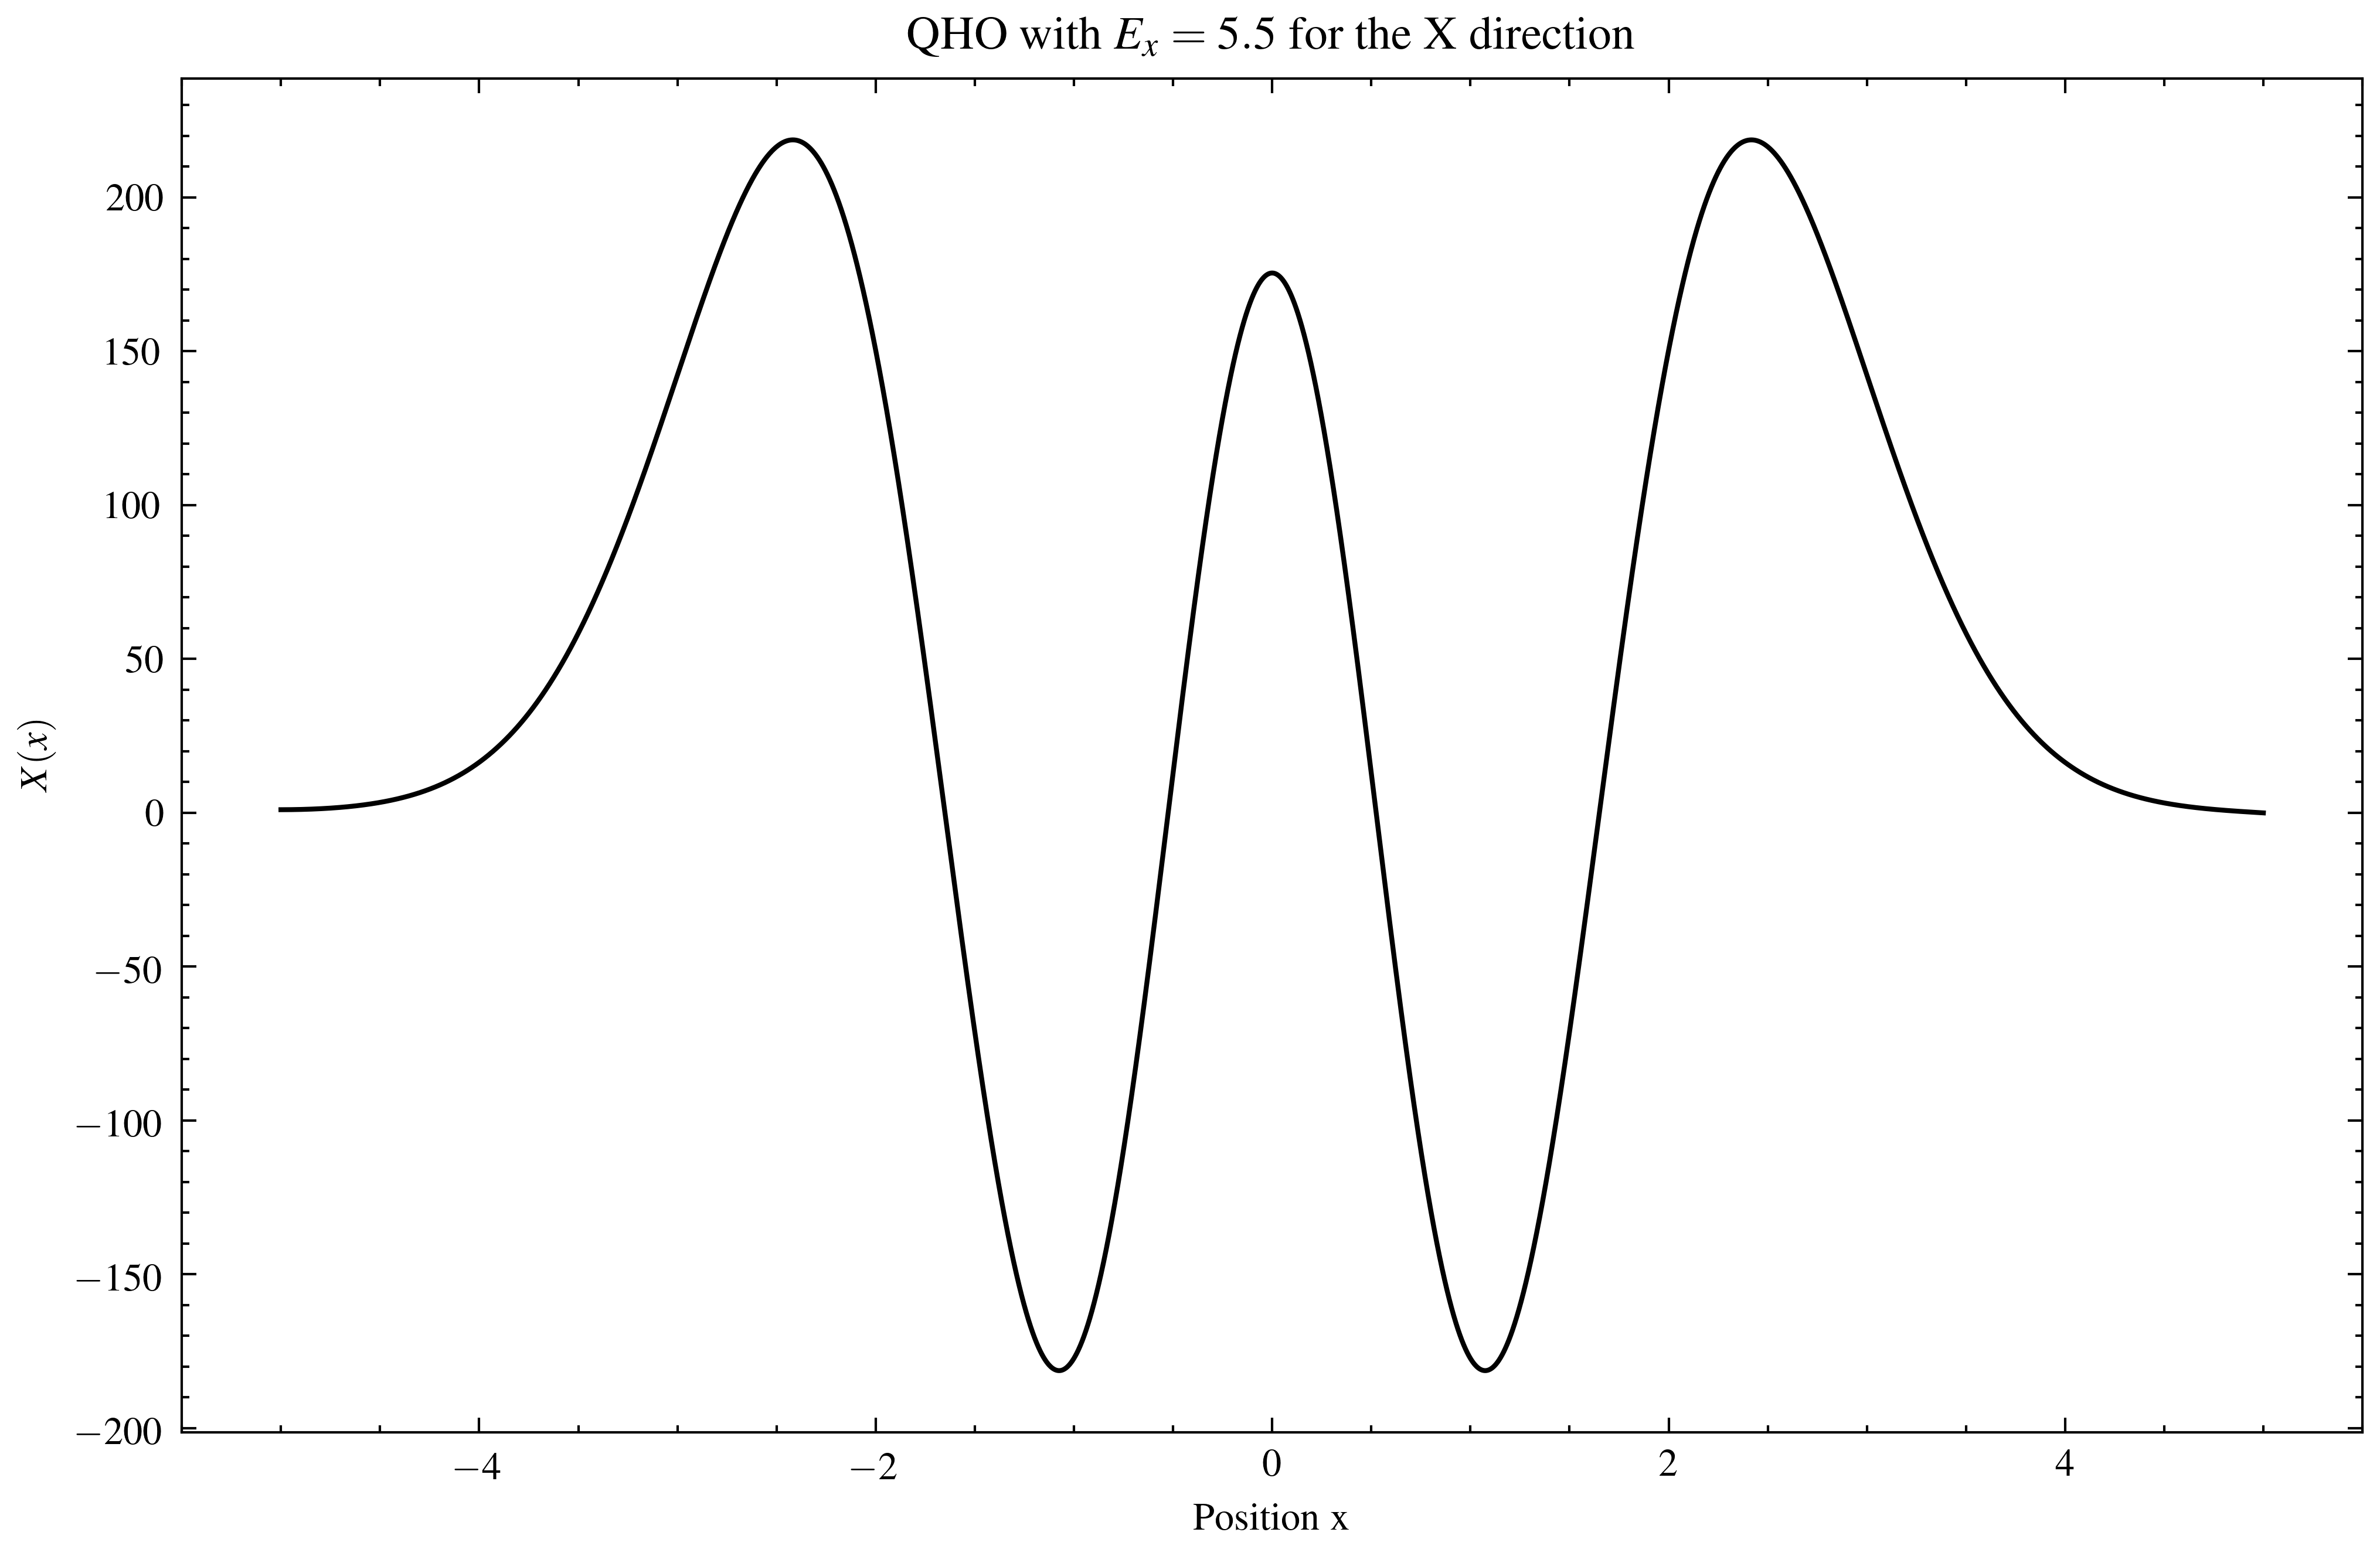

In [169]:
def dX_by_dx(varlist,x):
    return varlist[1]

def dz1_by_dx(varlist,x):
    return (k + (x**2 - 2*Ex))*varlist[0]


fnlist_x = [dX_by_dx,dz1_by_dx]


x0 = -5
phi_x_0s = [1,0]
xf=5


x,phi_x_dat = RK4_solve_coupled(fnlist_x,x0,phi_x_0s,xf,h)



import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(x,phi_x_dat[0])
plt.xlabel('Position x')
plt.ylabel(r'$X(x)$')
plt.title(rf'QHO with $E_x = {Ex}$ for the X direction')
plt.show()

## Solving the Y-component of the Schrödinger equation

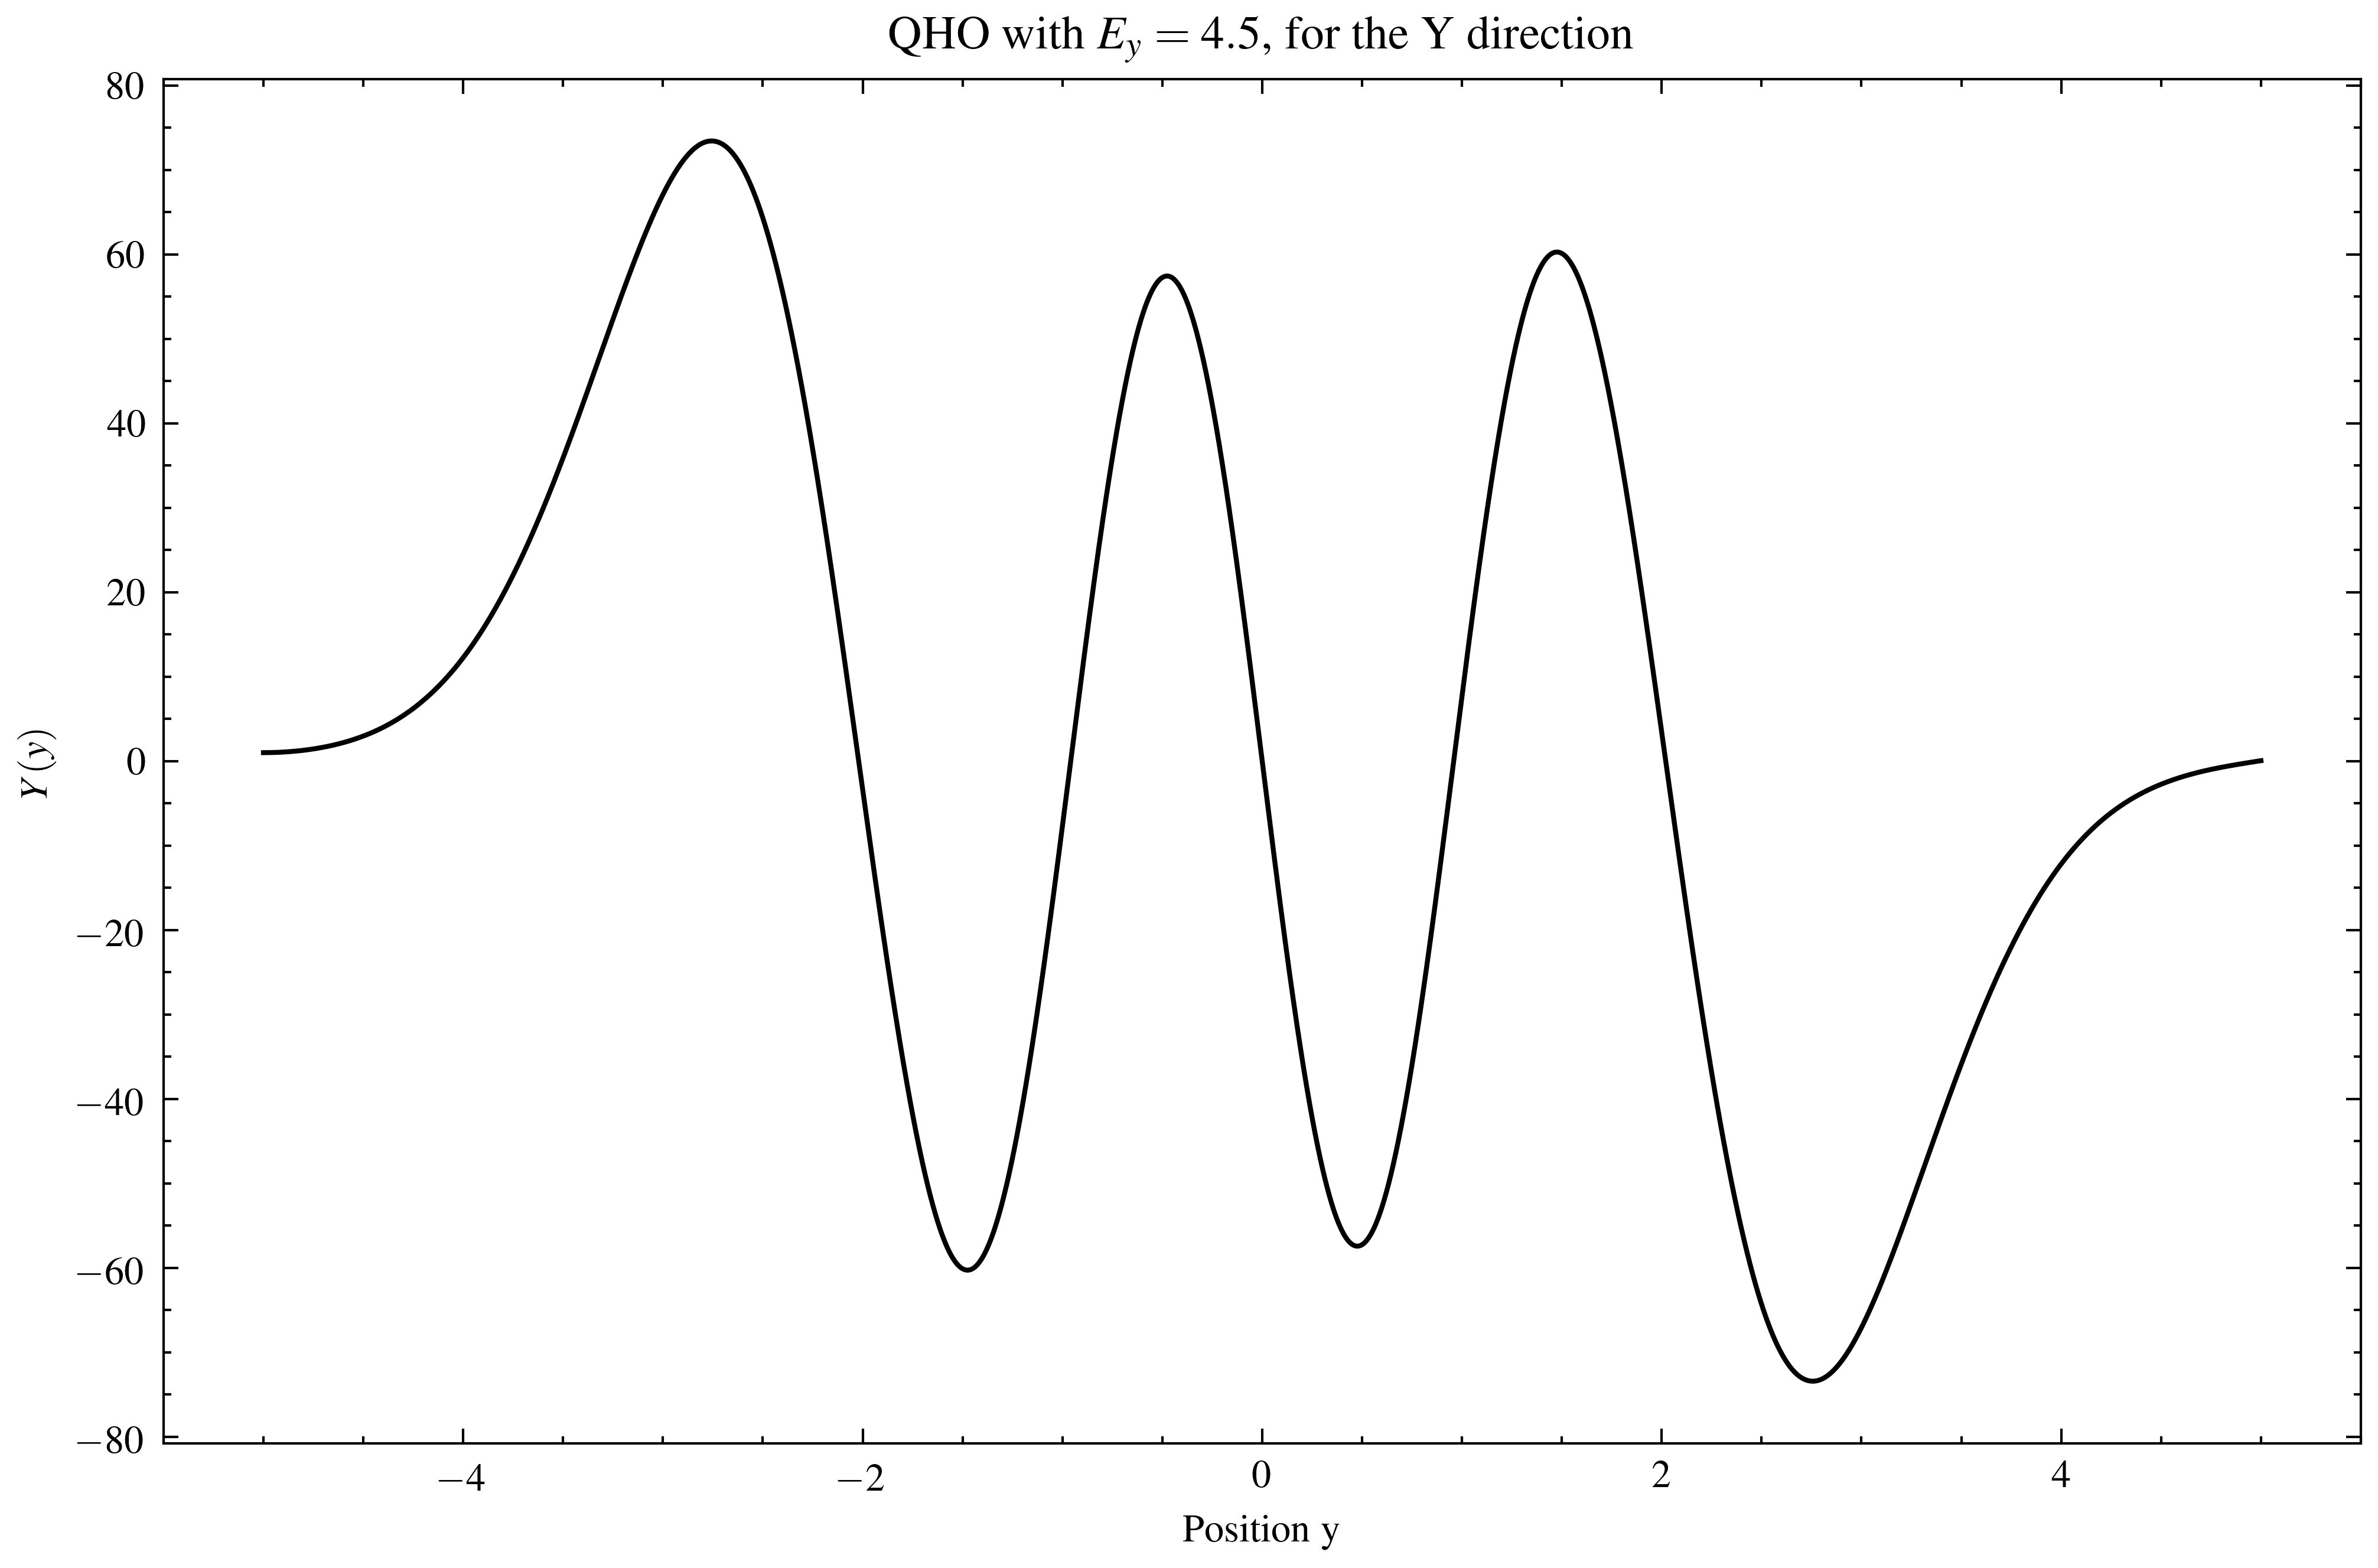

In [170]:
def dY_by_dx(varlist,x):
    return varlist[1]

def dz2_by_dx(varlist,x):
    return (-k + (x**2 - 2*Ey))*varlist[0]



fnlist_y = [dY_by_dx,dz2_by_dx]


y0 = -5
phi_y_0s = [1,0]
yf=5


y,phi_y_dat = RK4_solve_coupled(fnlist_y,x0,phi_y_0s,yf,h)


import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y,phi_y_dat[0])
plt.xlabel('Position y')
plt.ylabel(r'$Y(y)$')
plt.title(rf'QHO with $E_y = {Ey}$, for the Y direction')
plt.show()

In [171]:
phi_x = np.array(phi_x_dat[0])
phi_y = np.array(phi_y_dat[0])
Phi = phi_x*phi_y
Phi = Phi/np.linalg.norm(Phi)

In [172]:
x=np.array(x)
y=np.array(y)
r=np.sqrt(x**2 + y**2)

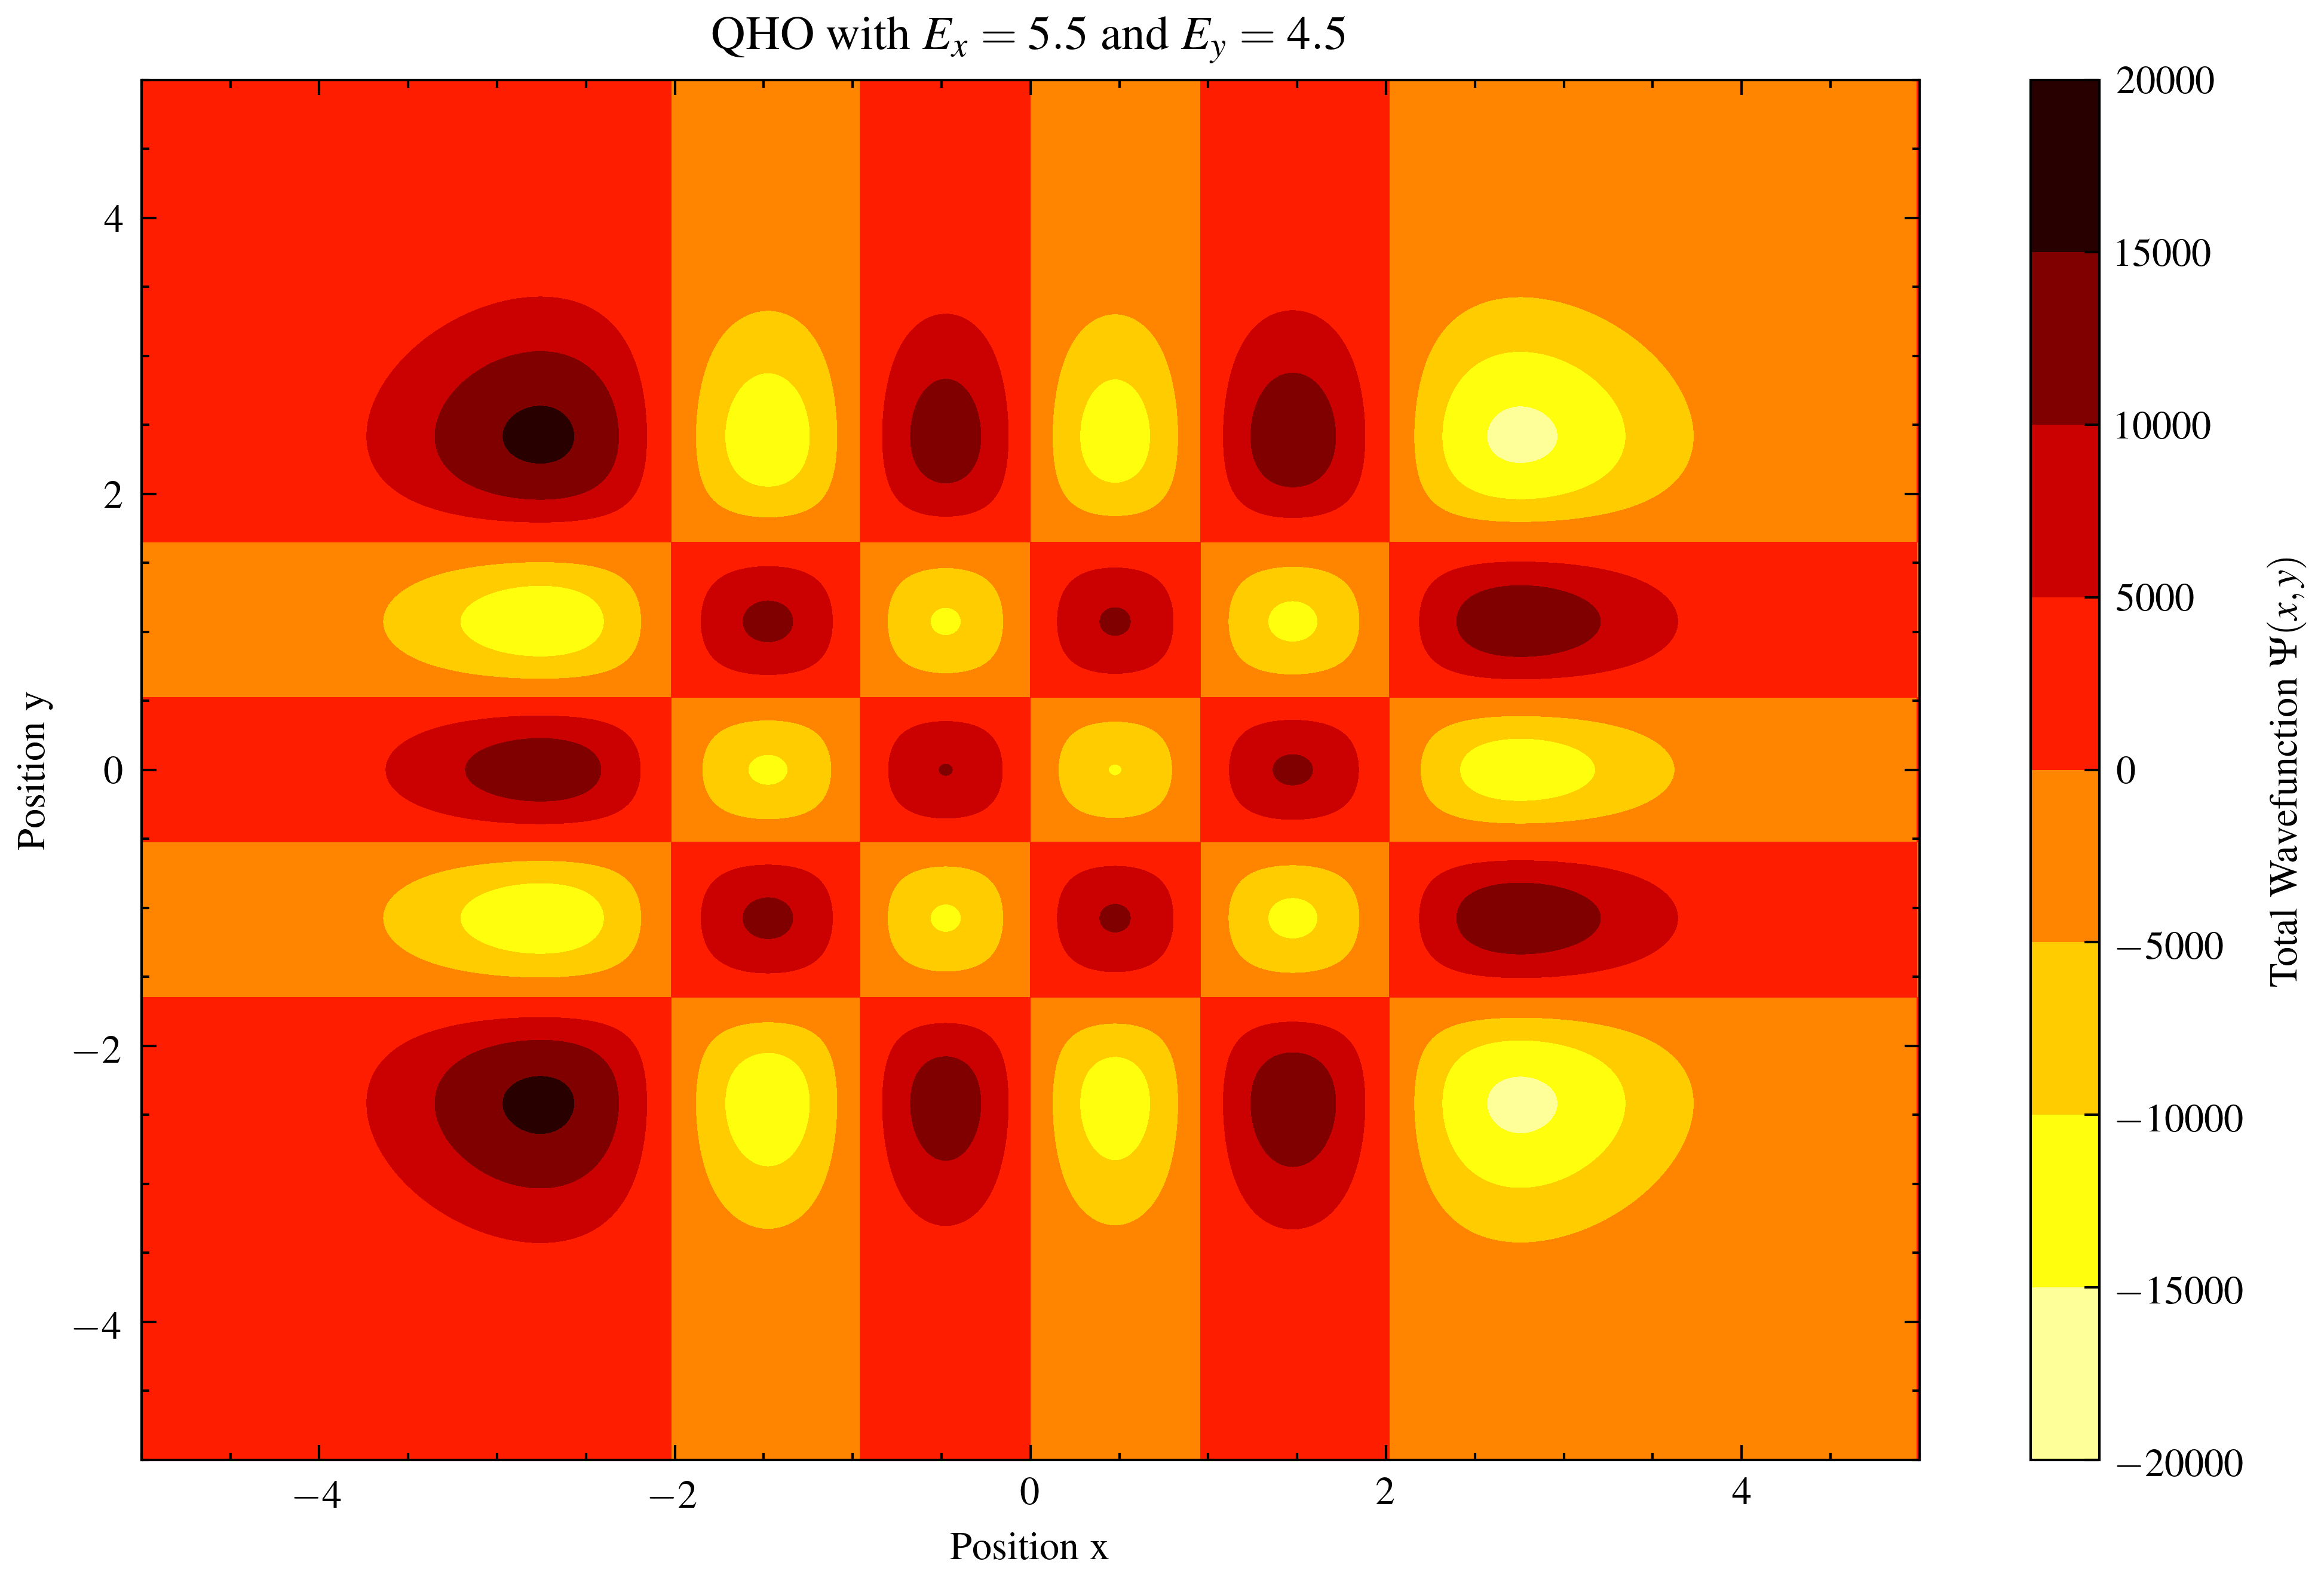

In [173]:
dataset= np.zeros((len(x),len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        dataset[i,j] = phi_x[i]*phi_y[j]


import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
fire_colors = ['lightyellow', 'yellow','orange', 'red','darkred','black']
fire_cmap = LinearSegmentedColormap.from_list("", fire_colors)

plt.figure(figsize=(8,5))
# plt.contourf(x,y,dataset,cmap='inferno')
plt.contourf(x,y,dataset,cmap=fire_cmap)
plt.xlabel('Position x')
plt.ylabel('Position y')
plt.title(rf'QHO with $E_x = {Ex}$ and $E_y = {Ey}$')
plt.colorbar(label='Total Wavefunction $\Psi(x,y)$')
plt.show()


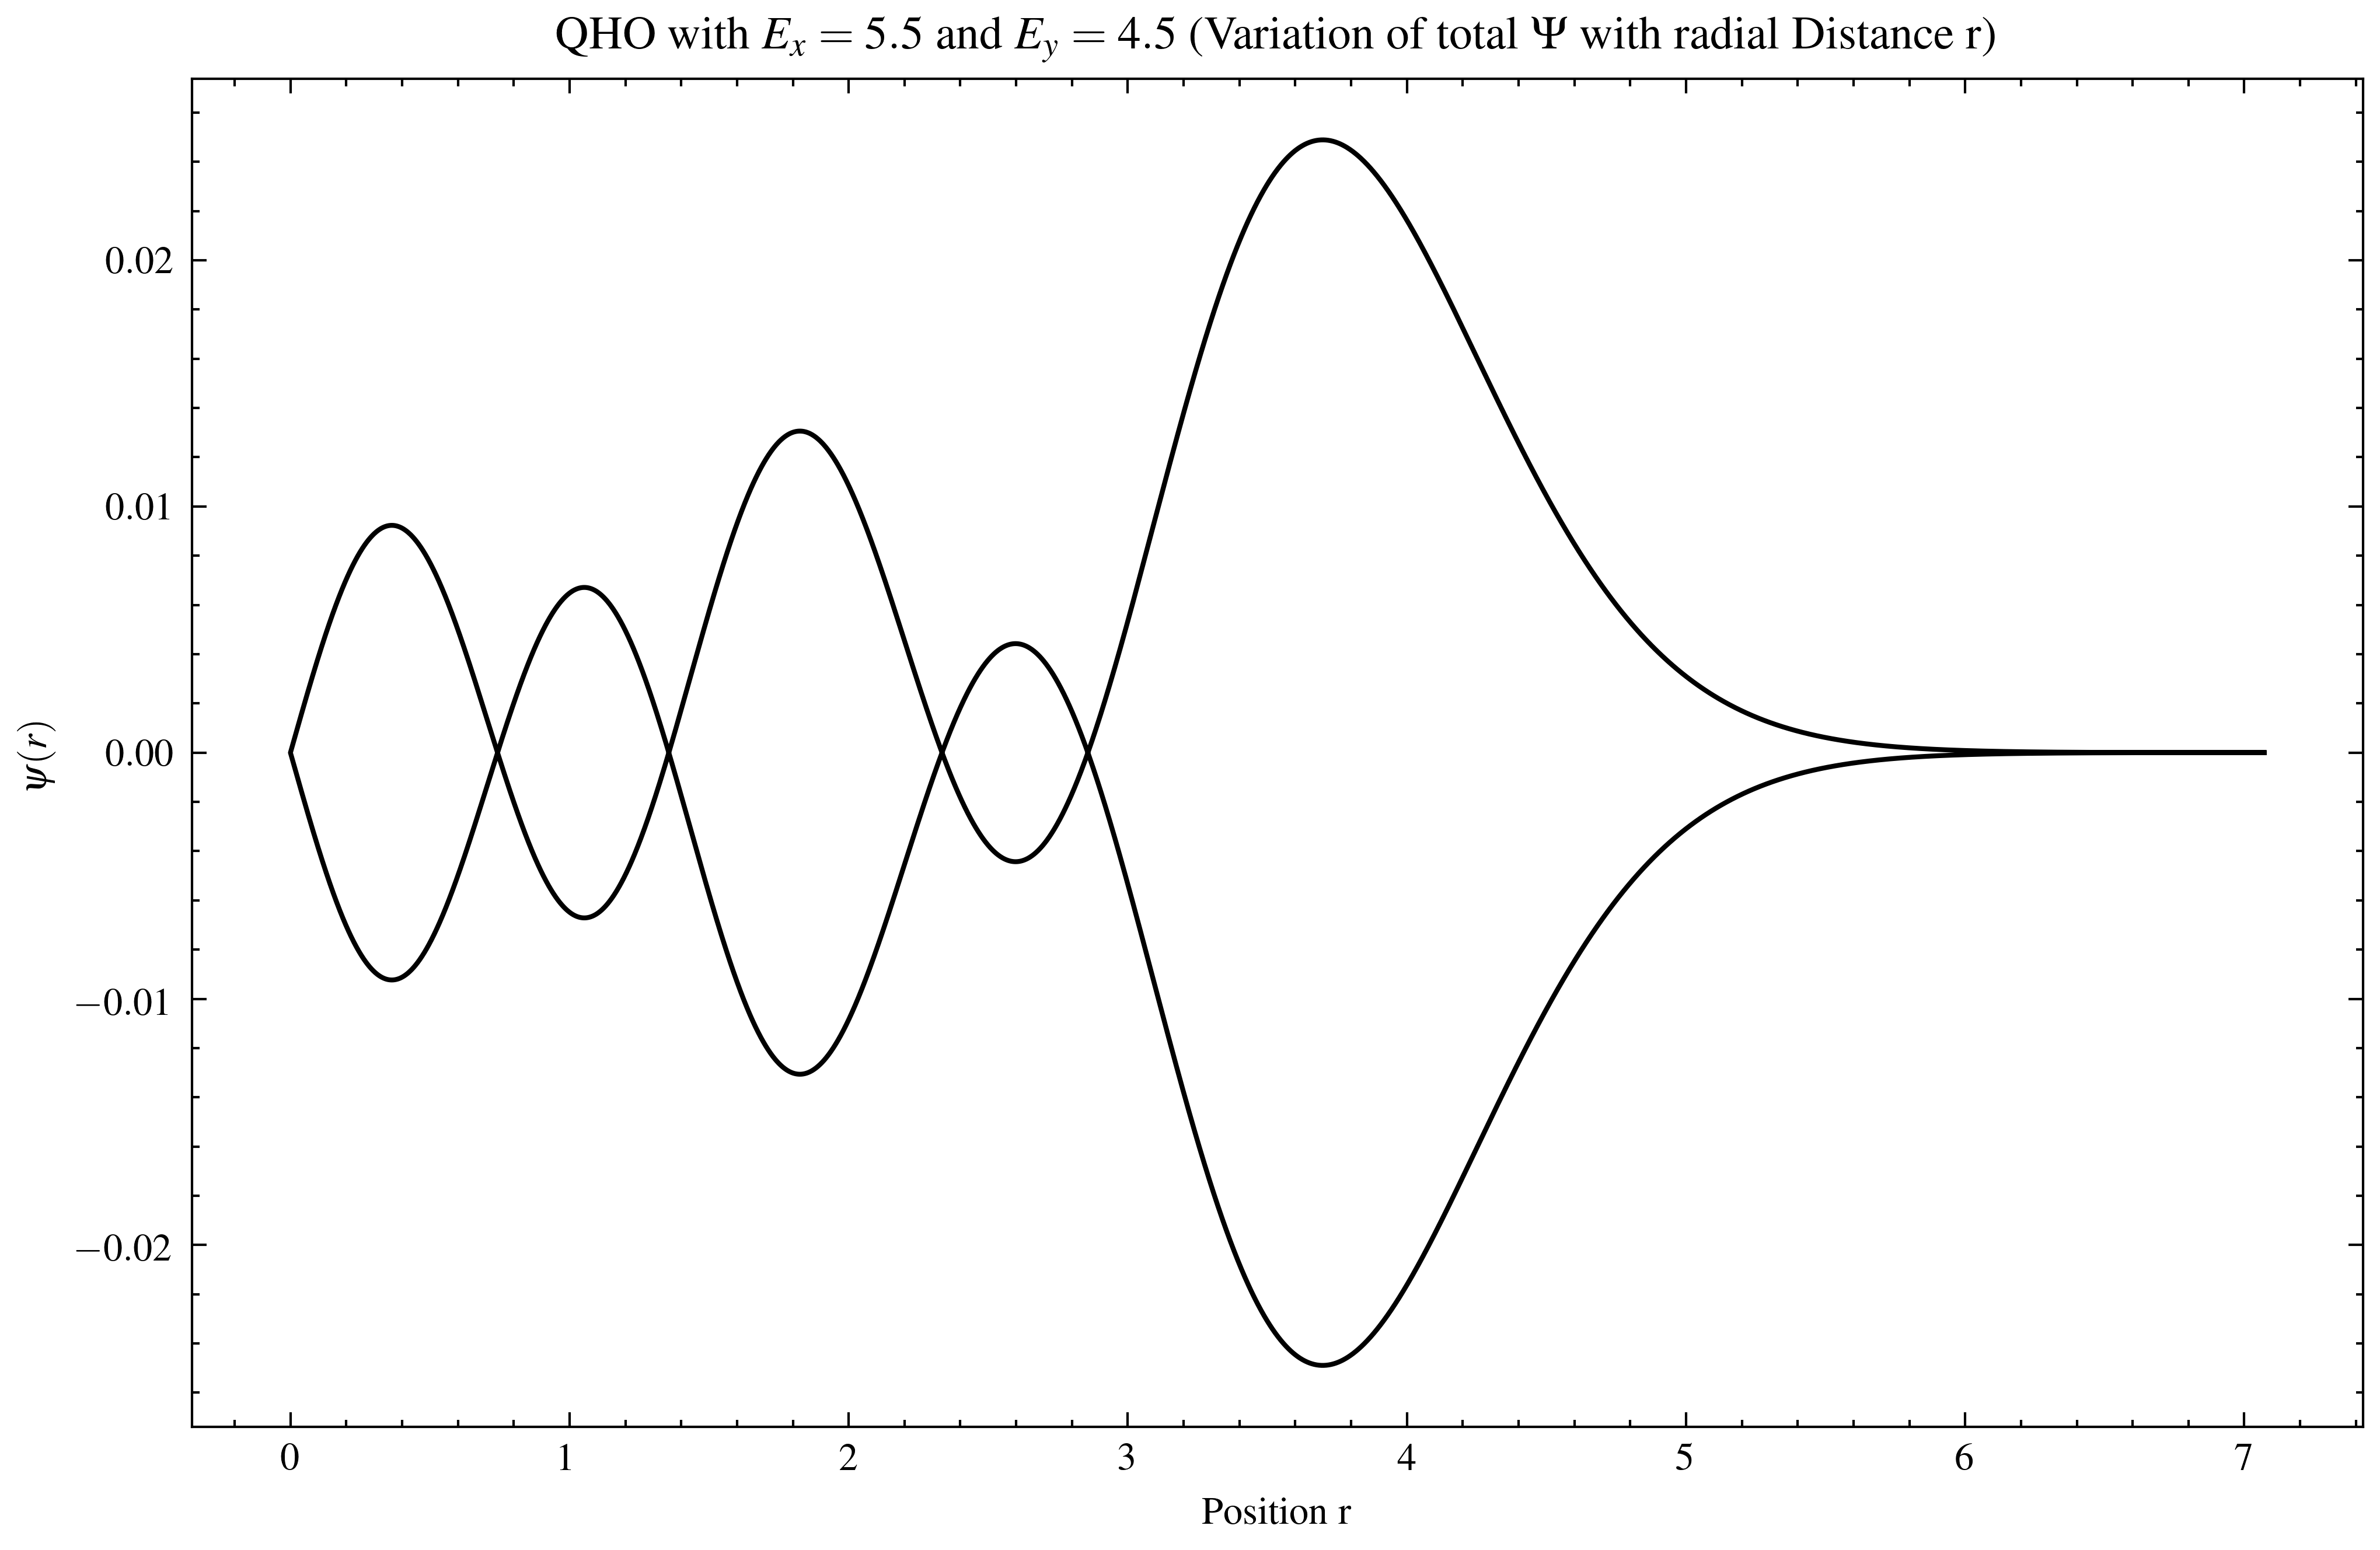

In [174]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(r,Phi)
plt.xlabel('Position r')
plt.ylabel(r'$\psi(r)$')
plt.title(rf'QHO with $E_x = {Ex}$ and $E_y = {Ey}$ (Variation of total $\Psi$ with radial Distance r)')
plt.show()